## ABOUT DATA

Date : Date of format YYYY-MM-DD



meantemp : Mean temperature averaged out from multiple 3 hour intervals in a day.


humidity : Humidity value for the day (units are grams of water vapor per cubic meter volume of air).


wind_speed : Wind speed measured in kmph.


meanpressure : Pressure reading of weather (measure in atm)

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import *

In [166]:
df_train = pd.read_csv("Documents\\SEM-3 Notes\\Econometrics\\Econometrics lab\\project\\DailyDelhiClimateTrain.csv")

df_test = pd.read_csv("Documents\\SEM-3 Notes\\Econometrics\\Econometrics lab\\project\\DailyDelhiClimateTest.csv")

In [167]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [168]:
df_train.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [169]:
df_train['meantemp'].isnull().sum()


0

In [170]:
df_train['humidity'].isnull().sum()


0

In [171]:
df_train['wind_speed'].isnull().sum()

0

In [172]:
df_train['meanpressure'].isnull().sum()

0

#### There are no missing values


In [173]:
df_train.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [174]:
df_train.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


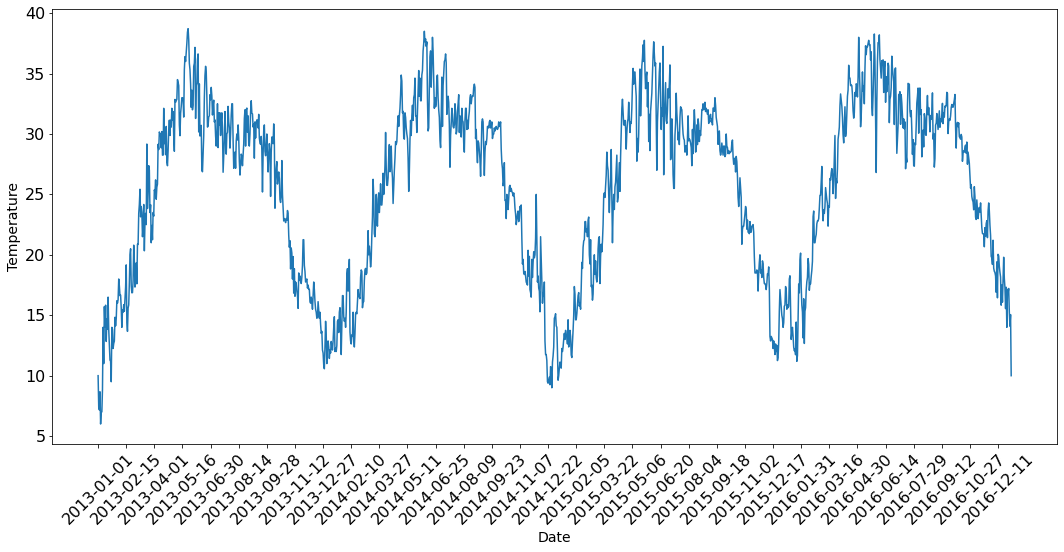

In [175]:
plt.figure(figsize=(18, 8))
plt.plot(df_train['date'], df_train['meantemp'])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df_train.date)+1, 45), rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### The pattern is repeating every year. There is seasonality in the data.


Temperature Years on Record:  2013 2014 2015 2016


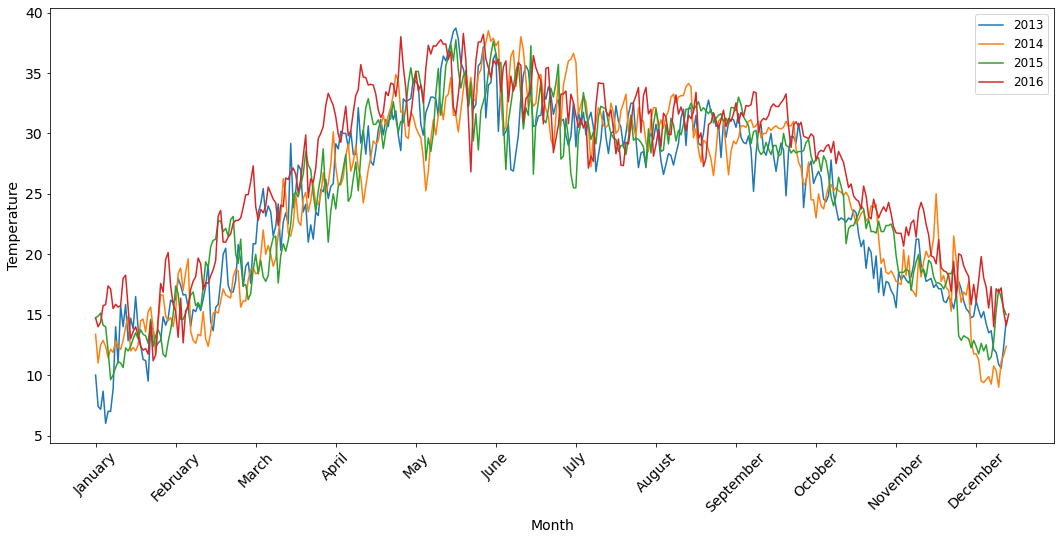

In [176]:
plt.figure(figsize=(18, 8))
dates = pd.to_datetime(df_train.date.iloc[:-1])
print("Temperature Years on Record: ", *dates.dt.year.unique())
for i in dates.dt.year.unique():
    plt.plot(df_train['meantemp'].iloc[:-1][dates.dt.year==i].values, label=i)
    
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 365, 32), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

#### Temperature from 2013 to 2016 have same trend

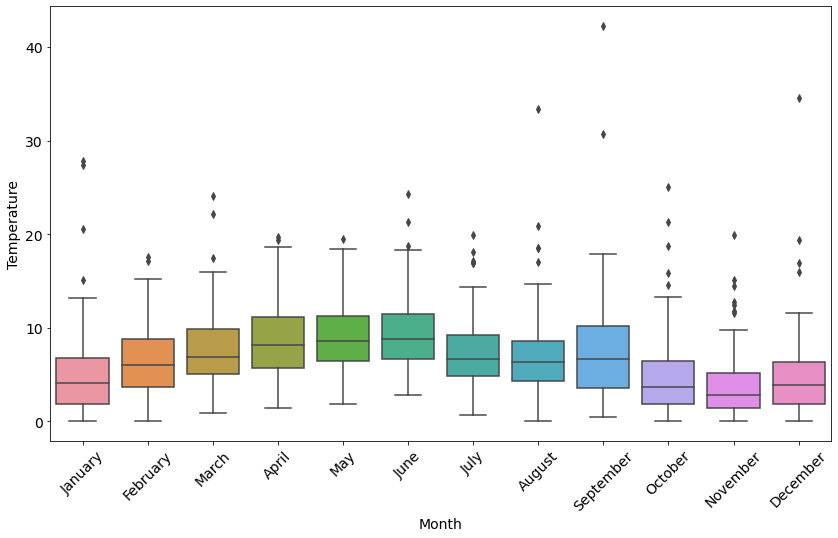

In [177]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=dates.dt.month.iloc[:-1], y='wind_speed', data=df_train.iloc[:-1])
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 12), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

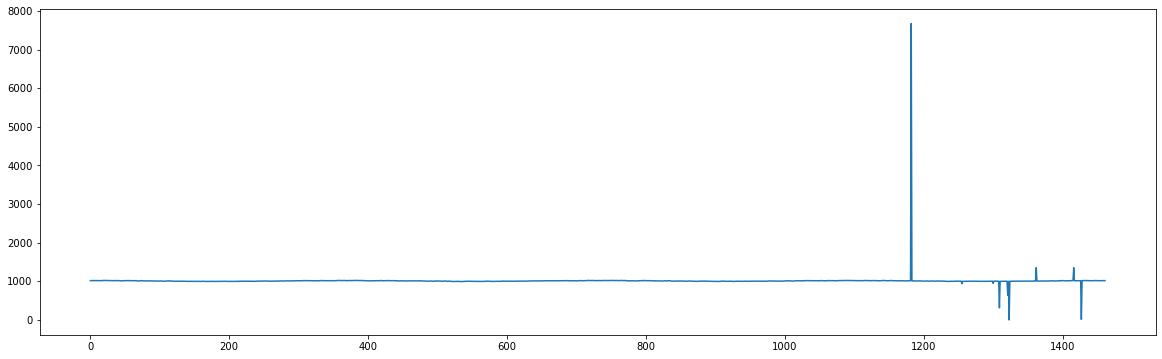

In [178]:
df_train['meanpressure'].plot(figsize=(20,6))

#### Meanpressure remained same without much fluctuations

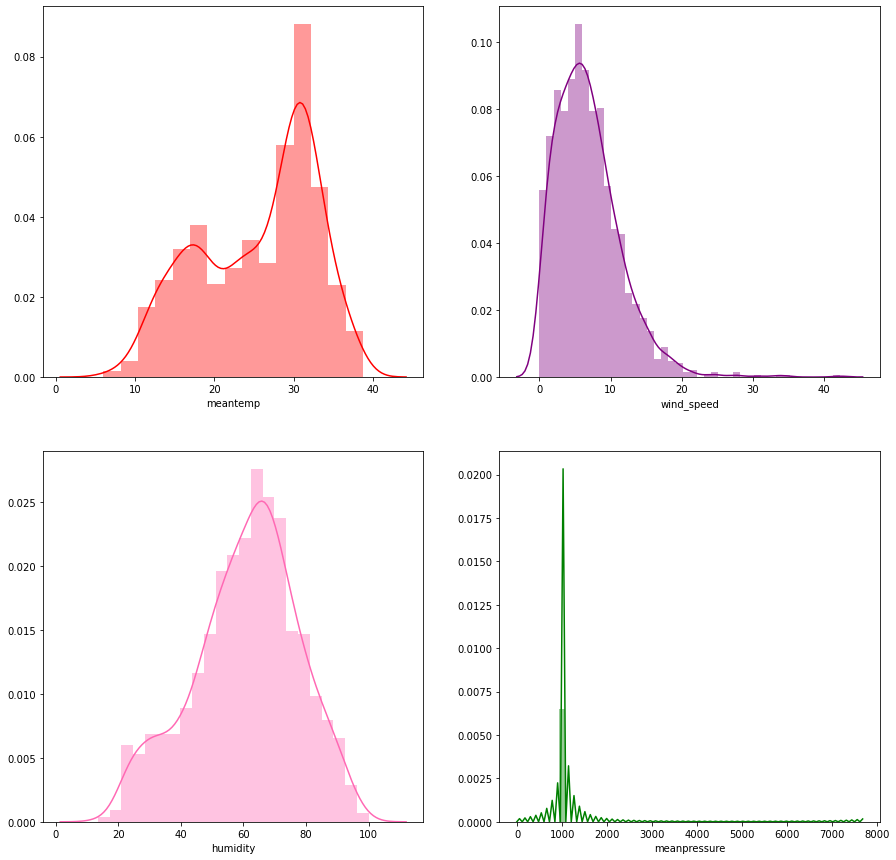

In [186]:
plt.figure(figsize=(15,15))


subplot(2,2,1)
sns.distplot(df_train['meantemp'], color = 'red')

subplot(2,2,2)
sns.distplot(df_train['wind_speed'], color = 'purple')

subplot(2,2,3)
sns.distplot(df_train['humidity'], color = 'hotpink')

subplot(2,2,4)
sns.distplot(df_train['meanpressure'], color = 'green')

plt.show()

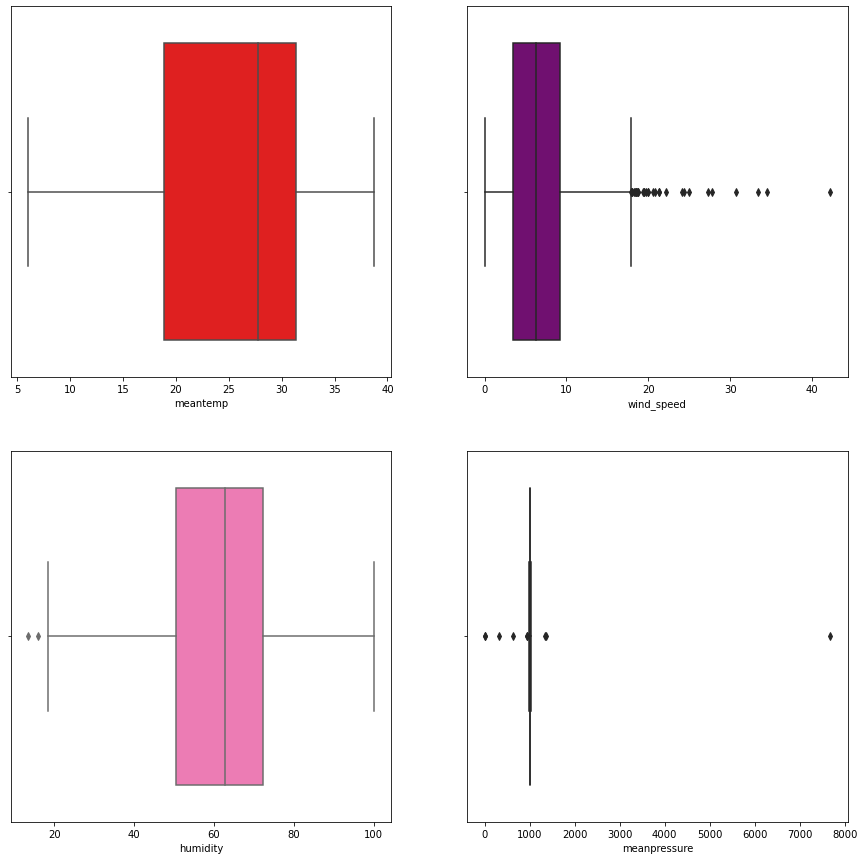

In [187]:
plt.figure(figsize=(15,15))


subplot(2,2,1)
sns.boxplot(df_train['meantemp'], color = 'red')

subplot(2,2,2)
sns.boxplot(df_train['wind_speed'], color = 'purple')

subplot(2,2,3)
sns.boxplot(df_train['humidity'], color = 'hotpink')

subplot(2,2,4)
sns.boxplot(df_train['meanpressure'], color = 'green')

plt.show()

### Data Engineering

In [188]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [206]:
df_train['month'] = df_train['date'].dt.month


In [207]:
df_train['month']

0        1
1        1
2        1
3        1
4        1
        ..
1457    12
1458    12
1459    12
1460    12
1461     1
Name: month, Length: 1462, dtype: int64

In [209]:
df_train['month_name'] = df_train['date'].dt.month_name()

In [210]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year,month_name
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,January
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,January
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,January
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,January
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,January


In [197]:
df_train['year'] = df_train['date'].dt.year

In [198]:
df_train['year']

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1457    2016
1458    2016
1459    2016
1460    2016
1461    2017
Name: year, Length: 1462, dtype: int64

In [199]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,January,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,January,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,January,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,January,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,January,2013


<Figure size 1080x1080 with 0 Axes>

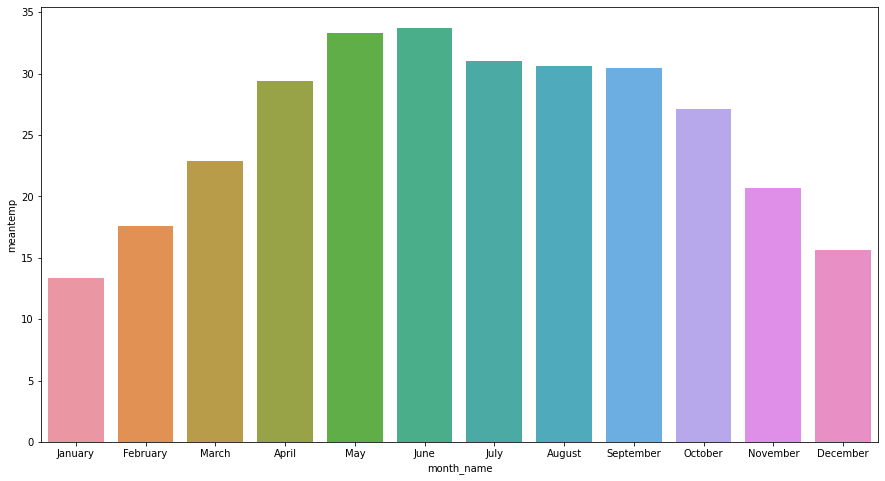

In [213]:
plt.figure(figsize=(15,15))
gb=df_train.groupby(['month','month_name'])['meantemp'].mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='month_name',y='meantemp',data=gb);

#### May and June months experienced higher temperature

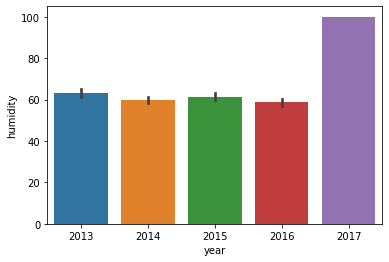

In [218]:
sns.barplot(df_train['year'], df_train['humidity'])

#### Humidity is much greater in the year 2017 than the rest of the years

In [217]:
df_train['year']

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1457    2016
1458    2016
1459    2016
1460    2016
1461    2017
Name: year, Length: 1462, dtype: int64

<Figure size 1080x1080 with 0 Axes>

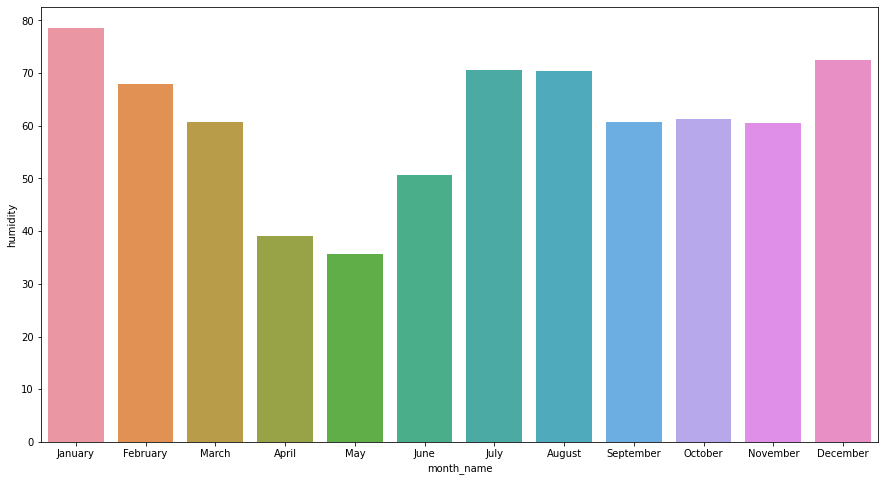

In [222]:
plt.figure(figsize=(15,15))
gb=df_train.groupby(['month','month_name'])['humidity'].mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='month_name',y='humidity',data=gb);

### Jan and Dec are most humid months in Delhi